### import libraries

In [ ]:
import pandas as pd
pd.set_option('display.float_format', '{:.4f}'.format)
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/drive


### loading data set

In [ ]:
divar_df = pd.read_csv('/content/drive/MyDrive/divar_posts_dataset.csv', index_col=[0])
divar_df.drop('id', axis=1, inplace=True)
divar_df.year.replace(to_replace="<1366",value=int("1366"), inplace=True)
divar_df['year'] = pd.to_numeric(divar_df['year'])
print(divar_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947635 entries, 0 to 947634
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   archive_by_user  947635 non-null  bool   
 1   brand            190892 non-null  object 
 2   cat1             947635 non-null  object 
 3   cat2             945877 non-null  object 
 4   cat3             775301 non-null  object 
 5   city             947635 non-null  object 
 6   created_at       947635 non-null  object 
 7   desc             947635 non-null  object 
 8   image_count      947635 non-null  int64  
 9   mileage          120451 non-null  float64
 10  platform         947635 non-null  object 
 11  price            947635 non-null  int64  
 12  title            947635 non-null  object 
 13  type             98529 non-null   object 
 14  year             120451 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(10)
memory usage: 109.4+ MB
None


### mode and median computation

In [ ]:
print(divar_df.describe())
print("\nmode:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(divar_df.mode(axis=0))
print("\nmedian:")
print(divar_df.median())

       image_count     mileage          price        year
count  947635.0000 120451.0000    947635.0000 120451.0000
mean        1.7859 100862.2919   3398461.5289   1387.6430
std         1.1277  98368.4709  13717407.5714      5.6393
min         0.0000      0.0000        -1.0000   1366.0000
25%         1.0000  19000.0000     30000.0000   1384.0000
50%         2.0000  75000.0000    150000.0000   1389.0000
75%         2.0000 160000.0000    600000.0000   1392.0000
max        16.0000 500000.0000 400000000.0000   1395.0000

mode:
   archive_by_user                   brand          cat1  \
0             True  پراید صندوق‌دار::Pride  for-the-home   

                        cat2   cat3    city     created_at        desc  \
0  furniture-and-home-decore  light  Tehran  Saturday 12PM  کاملا سالم   

   image_count     mileage platform  price title   type      year  
0            1 200000.0000   mobile     -1  بوفه  women 1393.0000  

median:
archive_by_user        1.0000
image_count            2.0

### calculate proper mean of price column

In [ ]:
copy_df = divar_df.loc[~(divar_df['price'] == -1)]
copy_df['price'].describe()

count      786203.0000
mean      4096271.8946
std      14964808.8678
min             1.0000
25%         71750.5000
50%        220000.0000
75%        870000.0000
max     400000000.0000
Name: price, dtype: float64

### plot boxplot

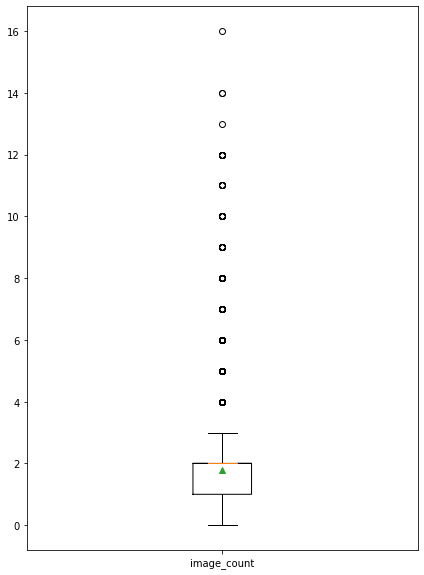

In [ ]:
plt.figure(figsize =(7, 10))
plt.boxplot(divar_df['image_count'], showmeans=True, labels=['image_count'], notch=True)
plt.show()

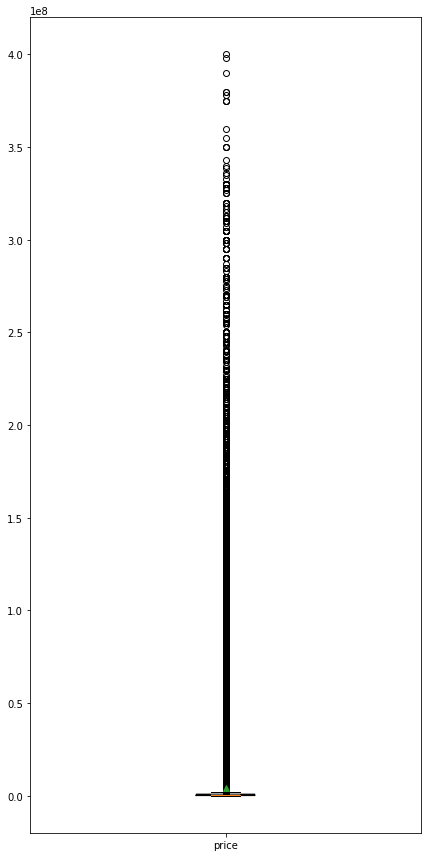

In [ ]:
plt.figure(figsize =(7, 15))
copy_df = divar_df.loc[~(divar_df['price'] == -1)]
plt.boxplot(copy_df['price'], showmeans=True, labels=['price'], notch=True)
plt.show()

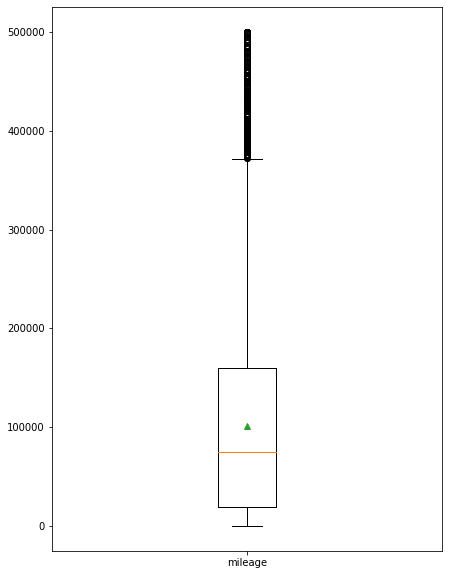

In [ ]:
copy_df = divar_df[divar_df['mileage'].notna()]
plt.figure(figsize =(7, 10))
plt.boxplot(copy_df['mileage'], showmeans=True, labels=['mileage'])
plt.show()

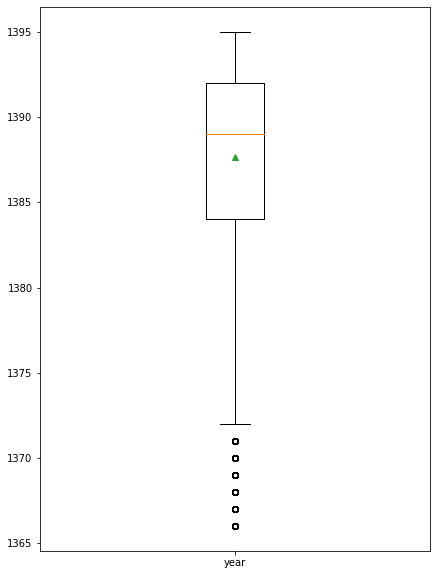

In [ ]:
copy_df = divar_df[divar_df['year'].notna()]
plt.figure(figsize =(7, 10))
plt.boxplot(copy_df['year'], showmeans=True, labels=['year'])
plt.show()

### finding outliers

In [ ]:
# finding the 1st quartile
q1 = np.quantile(divar_df['image_count'], 0.25)
# finding the 3rd quartile
q3 = np.quantile(divar_df['image_count'], 0.75)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(upper_bound, lower_bound)

3.5 -0.5


In [ ]:
copy_df = divar_df[divar_df['year'].notna()]
# finding the 1st quartile
q1 = np.quantile(copy_df['year'], 0.25)
# finding the 3rd quartile
q3 = np.quantile(copy_df['year'], 0.75)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(upper_bound, lower_bound)

1404.0 1372.0


In [ ]:
# finding the 1st quartile
q1 = np.quantile(divar_df['price'], 0.25)
# finding the 3rd quartile
q3 = np.quantile(divar_df['price'], 0.75)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(upper_bound, lower_bound)

1455000.0 -825000.0


In [ ]:
copy_df = divar_df[divar_df['mileage'].notna()]
# finding the 1st quartile
q1 = np.quantile(copy_df['mileage'], 0.25)
# finding the 3rd quartile
q3 = np.quantile(copy_df['mileage'], 0.75)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(upper_bound, lower_bound)

371500.0 -192500.0


### caculate completeness

In [ ]:
complete_1 = len(divar_df.dropna()) / len(divar_df)
print("first method: " + str(complete_1))

complete_2 = len(divar_df.dropna(subset=['image_count', 'desc', 'cat1', 'cat2', 'cat3'])) / len(divar_df)
print("second method: " + str(complete_2))

not_null_attribute = 0
for column in divar_df:
  not_null_attribute += len(divar_df[column].dropna())
complete_3 = not_null_attribute / (len(divar_df.columns) * len(divar_df))
print("third method: " + str(complete_3))

first method: 0.0
second method: 0.8181430614107752
third method: 0.7583943888381779
